In [17]:
#Import useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [109]:
#Datatype of each column or feature 
sales_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [111]:
#Import the dataset
sales_data = pd.read_csv("C:/Users/Pawan Sharma/Desktop/AnalytixLabs/Case Studies/Python/Python Foundation Case Study 4 - Python Visualization Case Study/SalesData.csv")
sales_data.head()


,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


## Question: 1

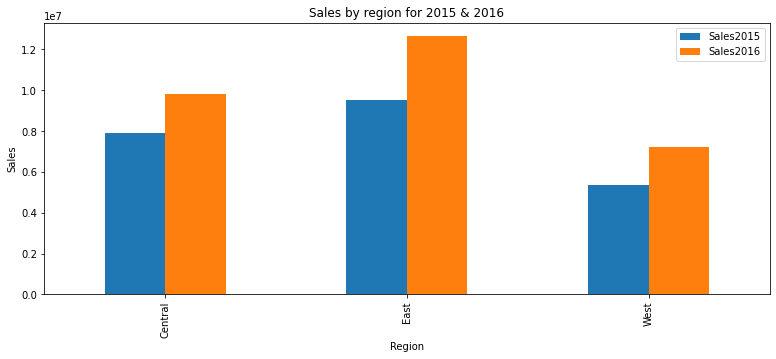

In [196]:
regional_sales = sales_data[["Region", "Sales2015","Sales2016"]].groupby(["Region"]).sum(["Sales2015", "Sales2016"])

regional_sales.plot.bar(figsize = (13,5), ylabel = "Sales")

plt.title("Sales by region for 2015 & 2016")
plt.show()


## Question-2

In [137]:
regional_sales2016 = sales_data[["Region", "Sales2016"]].groupby("Region").Sales2016.sum().reset_index()
regional_sales2016

,Region,Sales2016
0,Central,9.787809e+06
1,East,1.266723e+07
2,West,7.209689e+06


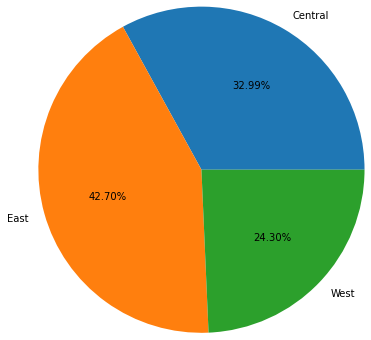

In [158]:
plt.figure(figsize = (10,5))
plt.pie(regional_sales2016.Sales2016, labels = regional_sales2016.Region, radius=1.5, autopct="%0.2f%%")
plt.show()

## Question 3

In [150]:
Region_tier_sales = sales_data[["Region", "Tier", "Sales2015", "Sales2016"]].pivot_table(index = "Region", columns = "Tier", values=["Sales2015","Sales2016"])
Region_tier_sales.head()


Sales2015                                            Sales2016  \
Tier            High          Low          Med          Out          High   
Region                                                                      
Central  6519.970693  3430.689709  5926.148610  5811.777857   8187.558342   
East     8224.994771  5094.157062  6041.559951  4663.318750  10535.244070   
West     5819.741621  3531.917789  5747.411104  3853.770000   7446.716107   

                                               
Tier             Low          Med         Out  
Region                                         
Central  4119.392182  7542.067253 -232.037857  
East     6468.528757  9059.045868    0.000000  
West     5786.853579  7833.273900    0.000000

<AxesSubplot:title={'center':'Sales of 2015 & 2016 with Region and Tiers'}, xlabel='Region', ylabel='Sales'>

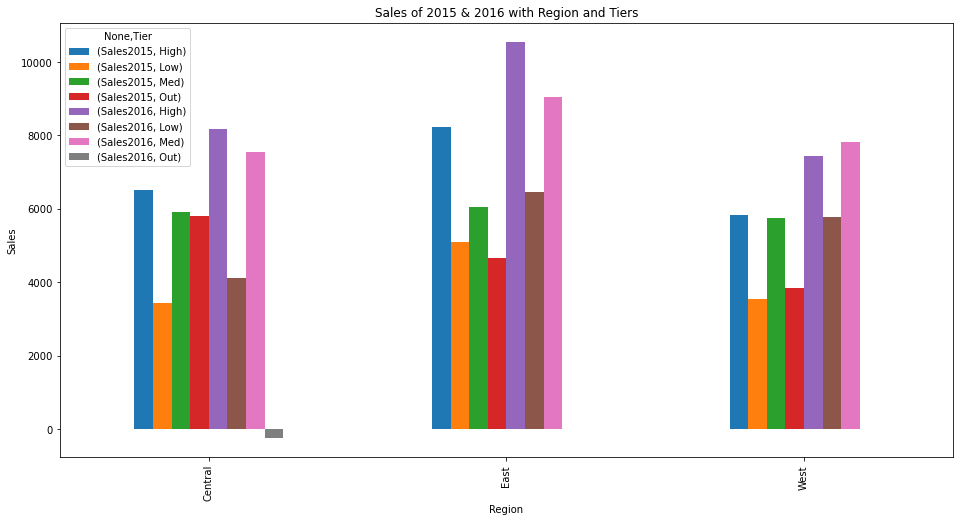

In [324]:
Region_tier_sales.plot.bar(figsize = (16,8), ylabel = "Sales", title = "Sales of 2015 & 2016 with Region and Tiers")

## Question 4

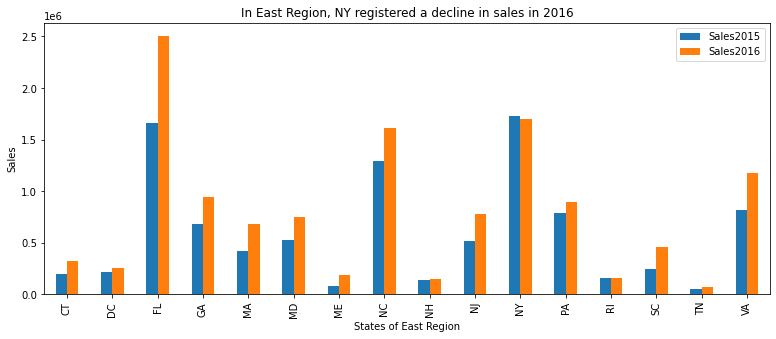

In [193]:
sales = sales_data[["Region", "State", "Sales2015", "Sales2016"]].groupby(["Region", "State"]).sum(["Sales2015","Sales2016"]).reset_index()
sales[sales["Region"]=="East"][["State", "Sales2015", "Sales2016"]].plot.bar(y = ["Sales2015", "Sales2016"], 
                                                                             x = "State", figsize = (13,5), 
                                                                             xlabel="States of East Region",
                                                                             ylabel="Sales",
                                                                             title = "In East Region, NY registered a decline in sales in 2016")

plt.show()


## Question 5

In [211]:
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [225]:
SalesData = sales_data[["Division", "Tier", "Units2015", "Units2016"]].loc[sales_data.Tier == "High", :].groupby("Division").sum(["Units2015","Units2016"])
SalesData

,Units2015,Units2016
Division,,
BIG APPLE,180.8330,231.0000
CHARGERS,123.6666,164.4999
CONGRESSIONAL,164.5003,205.0000
DIAMONDBACK,153.3334,176.6667
EMPIRE,414.3332,449.3332
GRIDIRON,213.6673,246.1675
GULF STREAM,185.0000,301.0009
HAILSTORM,187.8338,247.0003
KINETIC,214.3334,244.5001


<AxesSubplot:xlabel='Division', ylabel='Sales'>

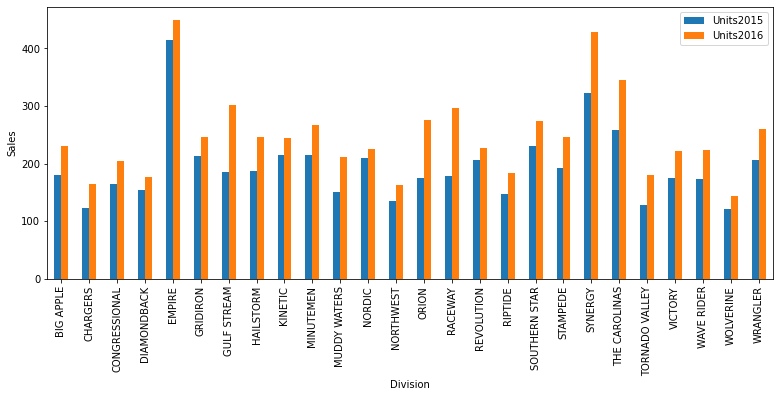

In [228]:
SalesData.plot.bar(y = ["Units2015", "Units2016"], figsize = (13,5), ylabel="Sales")
##From the graph, we can easily see that there is no decline number of units sold in 2016 as compared to 2015.

## Question 6

In [229]:
month =sales_data.Month

quarter = []

for i in month :
    if i in ["Jan","Feb","Mar"]:
        quarter.append("Q1")
    elif i in ["Apr","May","Jun"]:
        quarter.append("Q2")
    elif i in ["Jul","Aug","Sep"]:
        quarter.append("Q3")
    else:
        quarter.append("Q4")

In [236]:
#Creating a new column 'Qtr'
sales_data["Qtr"] = quarter
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


## Question 7

In [242]:
Sales_qtr = sales_data[["Qtr", "Sales2015", "Sales2016"]].groupby("Qtr").sum(["Sales2015", "Sales2016"]).reset_index()
Sales_qtr

,Qtr,Sales2015,Sales2016
0,Q1,5.485800e+06,6.997953e+06
1,Q2,5.390862e+06,7.237361e+06
2,Q3,6.164094e+06,7.861546e+06
3,Q4,5.713634e+06,7.567868e+06


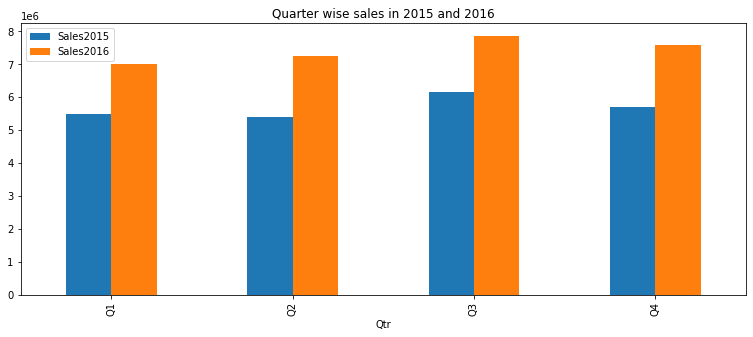

In [246]:
Sales_qtr.plot.bar(y=["Sales2015", "Sales2016"], x = "Qtr", title = "Quarter wise sales in 2015 and 2016", figsize = (13,5))
plt.show()

## Question 8

In [250]:
#Creating pivot table of the data based on "Qtr" and "Tier" to find total sales2016

pivot_table = sales_data.pivot_table(index = "Qtr", columns = "Tier", values = "Sales2016").reset_index()
pivot_table

Tier,Qtr,High,Low,Med,Out
0,Q1,7974.677515,5516.469593,7654.041681,0.000000
1,Q2,8752.018136,5031.608757,8758.157542,0.000000
2,Q3,9334.404693,5446.422671,8197.976091,-360.947778
3,Q4,9386.142545,5052.104694,8307.596804,0.000000


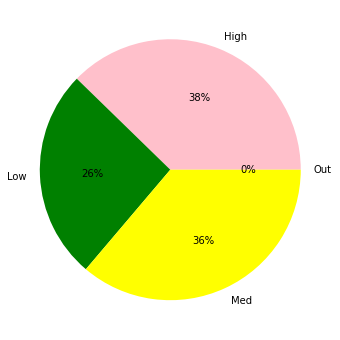

In [310]:
q1 = [7974.677515, 5516.469593, 7654.041681, 0.000000]
q2 = [8752.018136,5031.608757,8758.157542,0.000000]
q3 = [9334.404693,5446.422671,8197.976091,-360.947778]
q4 = [9386.142545, 5052.104694, 8307.596804, 0.000000]

plt.figure(figsize = (10,6))
plt.pie(x=q1,autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['pink', 'green', 'yellow', "orange"])

plt.show()

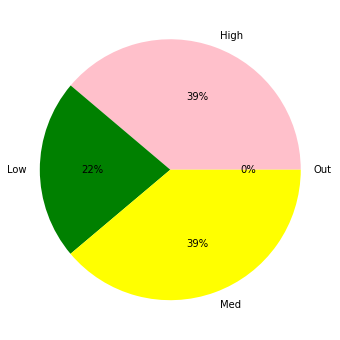

In [311]:
plt.figure(figsize = (10,6))
plt.pie(x=q2,autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['pink', 'green', 'yellow', "orange"])
plt.show()


ValueError: Wedge sizes 'x' must be non negative values

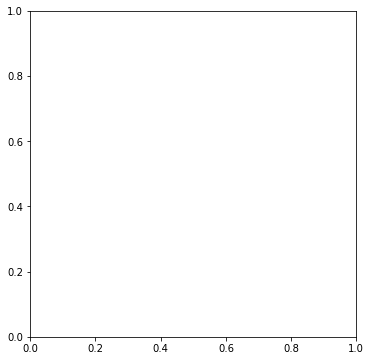

In [312]:
plt.figure(figsize = (10,6))
plt.pie(x=q3,autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['pink', 'green', 'yellow', "orange"])
plt.show()

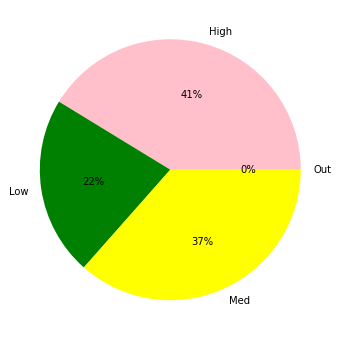

In [323]:
plt.figure(figsize = (10,6))
plt.pie(x=q4,autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['pink', 'green', 'yellow', "orange"])
plt.show()